In [795]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import os
import math
from statistics import mean, median, stdev

Load all data:

In [815]:
places = pd.read_csv("FF_Places.csv")
scPlaces = pd.read_csv("FF_Scoring_Places.csv")
scTotals = pd.read_csv("FF_Scoring_totals.csv")
moves = pd.read_csv("FF_Moves.csv")

<h2> League Finishes </h2>

I'll only be looking at the guys who have been in the league for all 5 years. There's 8 of us: <br>
Bud<br>
JA<br>
Cam<br>
Ders<br>
Willie<br>
Kenny<br>
Purser<br>
Cody<br>
<br>
Here's the raw finishing data for everyone:

In [797]:
places

,Player,2015,2016,2017,2018,2019
0,AP,NaN,NaN,5.0,NaN,11.0
1,Bud,8.0,2.0,3.0,4.0,4.0
2,Cam,12.0,10.0,12.0,3.0,12.0
3,Cody,4.0,7.0,8.0,2.0,3.0
4,Dennis,NaN,NaN,NaN,NaN,10.0
5,Ders,10.0,9.0,2.0,1.0,1.0
6,Heck,7.0,1.0,NaN,9.0,5.0
7,JA,1.0,12.0,1.0,5.0,2.0
8,Kenny,6.0,6.0,9.0,11.0,6.0
9,Kody,NaN,NaN,NaN,10.0,9.0


In [798]:
# Dropping everyone with incomplete data
places.dropna().reset_index(drop=True)

,Player,2015,2016,2017,2018,2019
0,Bud,8.0,2.0,3.0,4.0,4.0
1,Cam,12.0,10.0,12.0,3.0,12.0
2,Cody,4.0,7.0,8.0,2.0,3.0
3,Ders,10.0,9.0,2.0,1.0,1.0
4,JA,1.0,12.0,1.0,5.0,2.0
5,Kenny,6.0,6.0,9.0,11.0,6.0
6,Purser,5.0,8.0,11.0,7.0,8.0
7,Willie,11.0,3.0,10.0,12.0,7.0


<b>I'd rather have the years as an index and the players as columns:</b>

In [799]:
places = places.T

In [800]:
places.columns = places.iloc[0]

In [801]:
places = places.drop(places.index[0])

In [802]:
places.reset_index(inplace=True)
places = places.dropna(axis=1)
places['index'] = places['index'].apply(int)

In [803]:
places.append(places.sum().rename('Total')).sort_values(by='Total',axis=1)

Player,Bud,JA,Ders,Cody,Kenny,Purser,Willie,Cam,index
0,8,1,10,4,6,5,11,12,2015.0
1,2,12,9,7,6,8,3,10,2016.0
2,3,1,2,8,9,11,10,12,2017.0
3,4,5,1,2,11,7,12,3,2018.0
4,4,2,1,3,6,8,7,12,2019.0
Total,21,21,23,24,38,39,43,49,10085.0


<b> I didn't format this super well. "Index" is the year of the league. "Total" represents a golf-style score, we'll call that Blackout Points.</b>

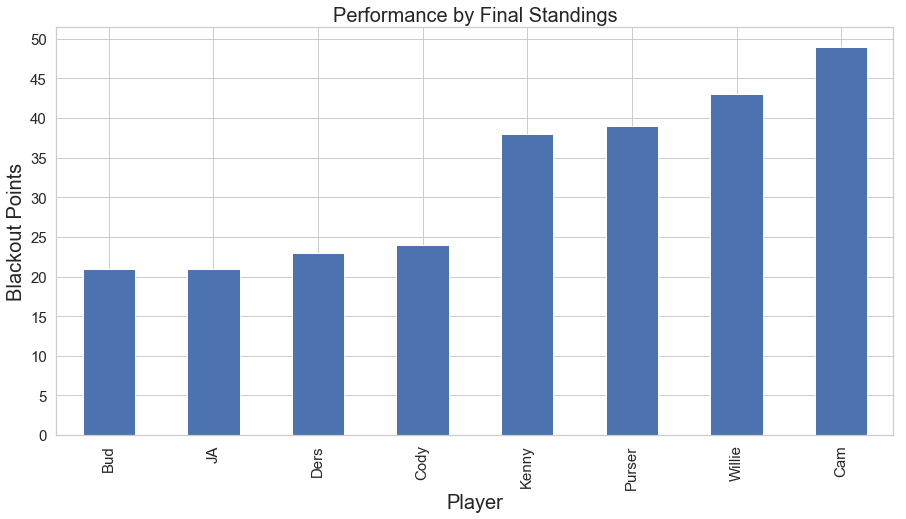

In [805]:
sns.set_style('whitegrid')
fig, ax=plt.subplots(figsize=(15,7.5))
ax.set_yticks(range(0,51,5))
plt.title('Performance by Final Standings', fontsize=20)
plt.ylabel('Blackout Points',fontsize = 20)
plt.xlabel('Player',fontsize = 20)
places.append(places.sum().rename('Total')).sort_values(by='Total',axis=1).drop('index',axis=1).loc['Total'].plot.bar(fontsize=15)

<b>"Blackout Points" can be considered like golf: take the total of all your finishes, lowest score indicates better performance over time.<br>
Bud has never won, but has finished top 4 in 4/5 years. JA has won twice, but finished last once, which is killing his rating. They are tied for the lead at 21.<br>
Cam is the worst player out of our long-term player group with 3/5 last place finishes and 49 Blackout Points.<br>
I sucked for the first two years, but have been running train on you hoes for the last three.<br>
There's a pretty clear top-4 / bottom-4 divide here, with Cody ahead of Kenny by 14 points.
</b>

Text(2018.3, 11.5, 'Willie:43 BP')

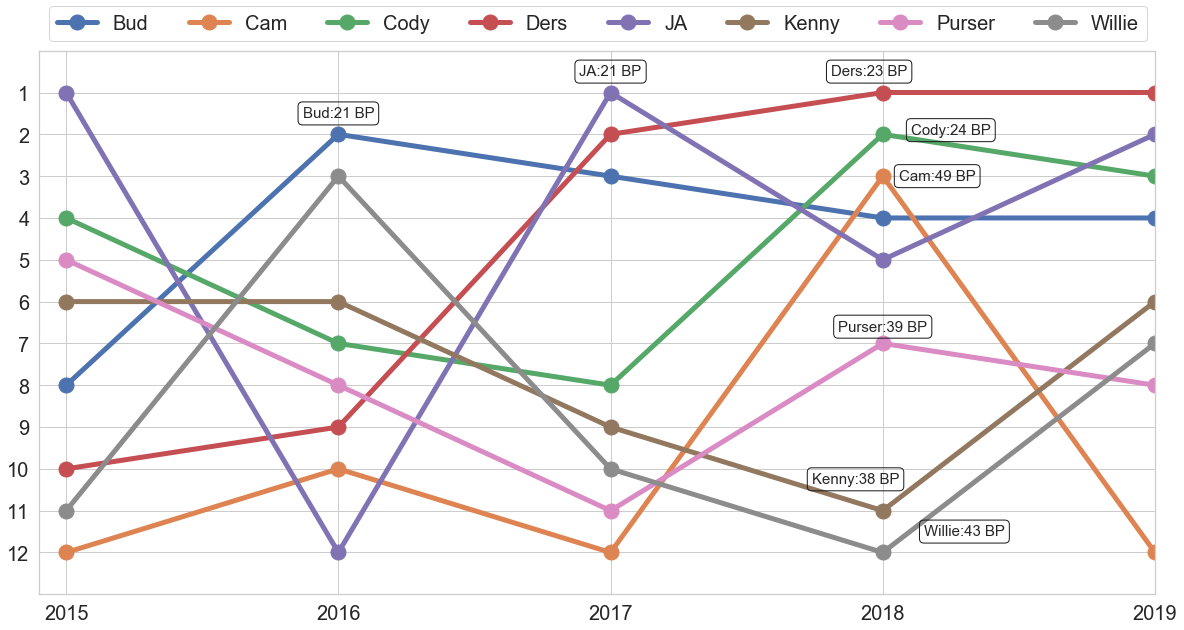

In [806]:
# Create the grid
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlim(2014.9,2019)
ax.set_ylim(13,0)
ax.set_xticks(places['index'])
ax.set_yticks(range(1,13,1))

# Plot the placement data
plt.plot('index','Bud',data=places,linewidth=5,marker = 'o',markersize=15)
plt.plot('index','Cam',data=places,linewidth=5,marker = 'o',markersize=15)
plt.plot('index','Cody',data=places,linewidth=5,marker = 'o',markersize=15)
plt.plot('index','Ders',data=places,linewidth=5,marker = 'o',markersize=15)
plt.plot('index','JA',data=places,linewidth=5,marker = 'o',markersize=15)
plt.plot('index','Kenny',data=places,linewidth=5,marker = 'o',markersize=15)
plt.plot('index','Purser',data=places,linewidth=5,marker = 'o',markersize=15)
plt.plot('index','Willie',data=places,linewidth=5,marker = 'o',markersize=15)

# Add legend
plt.legend(bbox_to_anchor = (0,1.1),loc='upper left',ncol=8,prop = {'size':20})

# Add text bubbles
plt.text(2016,1.5,"Bud:21 BP",size=15,ha="center",va="center",bbox=dict(boxstyle="round",ec='k',fc='none'))
plt.text(2017,0.5,"JA:21 BP",size=15,ha="center",va="center",bbox=dict(boxstyle="round",ec='k',fc='none'))
plt.text(2017.95,0.5,"Ders:23 BP",size=15,ha="center",va="center",bbox=dict(boxstyle="round",ec='k',fc='none'))
plt.text(2018.25,1.9,"Cody:24 BP",size=15,ha="center",va="center",bbox=dict(boxstyle="round",ec='k',fc='none'))
plt.text(2018.2,3,"Cam:49 BP",size=15,ha="center",va="center",bbox=dict(boxstyle="round",ec='k',fc='none'))
plt.text(2018,6.6,"Purser:39 BP",size=15,ha="center",va="center",bbox=dict(boxstyle="round",ec='k',fc='none'))
plt.text(2017.9,10.25,"Kenny:38 BP",size=15,ha="center",va="center",bbox=dict(boxstyle="round",ec='k',fc='none'))
plt.text(2018.3,11.5,"Willie:43 BP",size=15,ha="center",va="center",bbox=dict(boxstyle="round",ec='k',fc='none'))


Here's a quick visualization to see your performance over time. <Br><b>I (Ders)</b> have improved every year that we've played, and I'm coming for that 3-peat like Tom Brady in 2004.<br> <b>Kenny</b> seems to have a thing for 6th place. Maybe that's why he took the 6th overall pick this year. Hey, don't write yourself off yet.<br> <b>Cam</b> thought he was out of the gutter in 2018, but then got dragged back down to float in the sewer with Pennywise. <br><b>Willie</b> has some pretty serious fluctuation, and might be trending up for 2020.<br> <b>Purser</b> is a remarkable Commissioner who we should all be thankful for. He is also a totally unremarkable fantasy player, with a 5th place finish in the league's first year and never topping 7th after that. <br><b>Bud</b> is like Peyton Manning's mid-2000's Colts: highly consistent with super strong regular seasons, but cannot get over the hump when it matters.<br> <b>JA</b> had a trash 2016 season that continues to look like an outlier, and he'll be a contender for the foreseeable future. He notably went from first to last immediately back to first. Fantasy Jameis out here. <br> <b>Cody</b> could be called Bud Light. He has been a contender for two straight years, and has never finished lower than 8th (Bud is the only other player who can say that).

<h1> Scoring </h1><br>
Fantasy finishes by placement involve a lot of luck in the playoffs. Let's see what the raw scoring output looks like.

In [814]:
scTotals

Player,index,Bud,Cam,Cody,Ders,JA,Kenny,Purser,Willie
0,2015,1369.4,1348.2,1434,1216.7,1694.9,1374.6,1353.6,1365.8
1,2016,1546,1162.1,1322.9,1533.7,1114.4,1333.7,1292.5,1423.4
2,2017,1263,1165.3,1154.3,1443.2,1399,1243.8,1196.3,880.8
3,2018,1560.6,1490.7,1370.2,1578.6,1455.9,1343.3,1339.9,1249.5
4,2019,1361,1210.7,1380.2,1511.9,1712.7,1348.3,1272.7,1455.6


In [816]:
scTotals = scTotals.T

In [817]:
scTotals.columns = scTotals.iloc[0]

In [818]:
scTotals = scTotals.drop(scTotals.index[0])

In [819]:
scTotals.reset_index(inplace=True)
scTotals['index'] = scTotals['index'].apply(int)

In [830]:
scTotals.append(scTotals.sum().rename('Total')).drop('index',axis=1).sort_values(by='Total',axis=1,ascending=False)

Player,JA,Ders,Bud,Cody,Kenny,Purser,Cam,Willie,Heck,Murray,Pudwell,Norcott,AP,Kody,Steven,Dennis
0,1694.9,1216.7,1369.4,1434,1374.6,1353.6,1348.2,1365.8,1411,1451.1,1580.1,1473.3,NaN,NaN,NaN,NaN
1,1114.4,1533.7,1546,1322.9,1333.7,1292.5,1162.1,1423.4,1509.1,1395.6,1353.4,1254.3,NaN,NaN,NaN,NaN
2,1399,1443.2,1263,1154.3,1243.8,1196.3,1165.3,880.8,NaN,1162.7,1463.8,1317.1,1351.2,NaN,NaN,NaN
3,1455.9,1578.6,1560.6,1370.2,1343.3,1339.9,1490.7,1249.5,1344,1546.7,NaN,NaN,NaN,1202,1274.3,NaN
4,1712.7,1511.9,1361,1380.2,1348.3,1272.7,1210.7,1455.6,1335.3,NaN,NaN,NaN,1286.3,1154.7,NaN,1182.9
Total,7376.9,7284.1,7100,6661.6,6643.7,6455,6377,6375.1,5599.4,5556.1,4397.3,4044.7,2637.5,2356.7,1274.3,1182.9


<B> Obviously bigger numbers are better here. This pretty much matches up with league performance order. Willie's total is being brought down by his abysmal 2017 season where he didn't even reach 900 points - the next lowest number is JA in 2016 with 1114, a full 234 points more. Just an unbelievably bad team there.<br>
<br>
I got pretty lucky this year in terms of pure points scored, mostly because Saquon sucked the entire season up until the playoffs when he decided to drop a 40-burger on JA's face. I was UNLUCKY in 2016, finishing 9th despite being the 2nd highest scorer (and only 2nd by 13 points). We'll get more into that later.
</B>

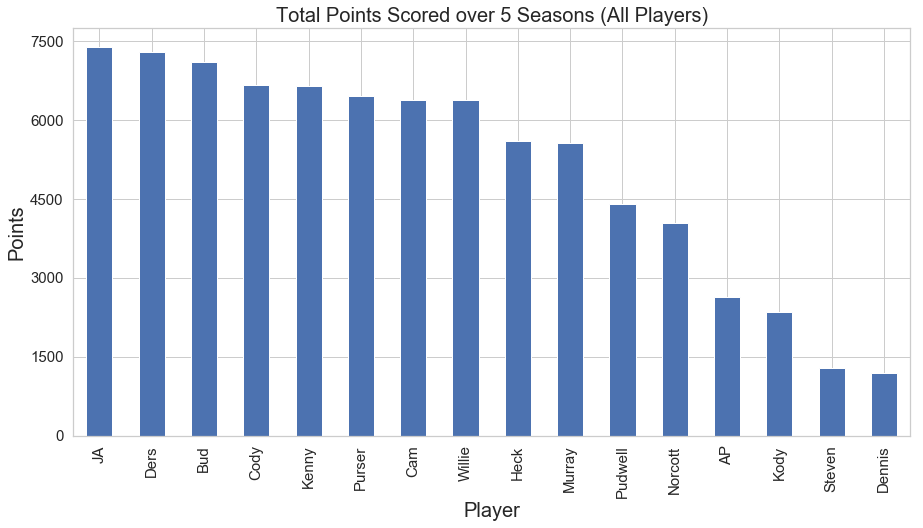

In [831]:
fig, ax=plt.subplots(figsize=(15,7.5))
ax.set_yticks(range(0,7501,1500))
plt.title('Total Points Scored over 5 Seasons (All Players)', fontsize=20)
plt.ylabel('Points',fontsize = 20)
plt.xlabel('Player',fontsize = 20)
scTotals.append(scTotals.sum().rename('Total')).drop('index',axis=1).sort_values(by='Total',axis=1, ascending=False).loc['Total'].plot.bar(fontsize=15)

In [835]:
scTotals = scTotals.dropna(axis=1)
columns=['Bud', 'Cam', 'Cody', 'Ders', 'JA', 'Kenny', 'Purser', 'Willie']

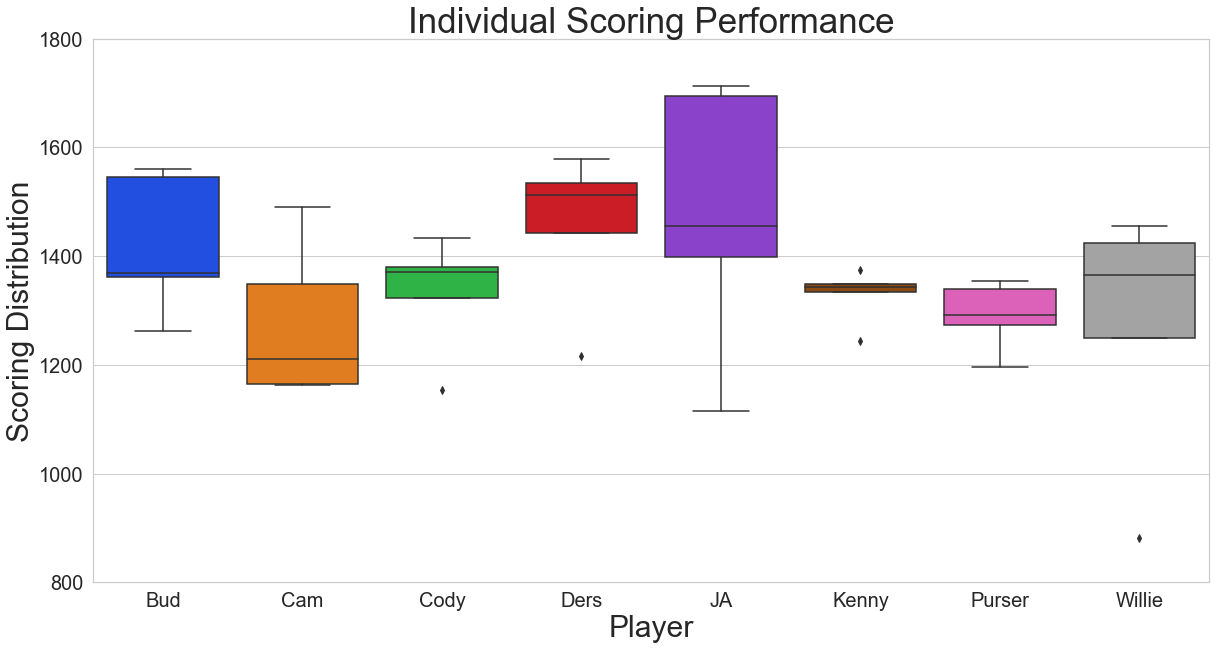

In [836]:
fig,ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylim(800,1800)
plt.xlabel('Player',fontsize = 30)
plt.ylabel('Scoring Distribution',fontsize = 30)
plt.title('Individual Scoring Performance', fontsize = 35)
sns.boxplot(data=scTotals[columns],palette='bright')

Box plots basically tell you how consistent your scoring is. They give you your min/max scoring output, your median, and your first and third quartile.<br> We can see <b>JA</b> has the largest range of scoring by far, visualizing how he's being dragged down by that 12th place finish in 2016 and boosted by how fucking wild Lamar Jackson was in 2019.<br> <b>Kenny</b> has the tightest little spread of all, right smack in the middle of everyone with not much variation (everything, everything will be all right, all right).<br> <b>As you can see, I am a beast </b> with the highest median scoring of everyone.<br> I had to adjust the chart's limits so you could see <b>Willie's</b> very embarassing and shameful 880-point season down in the bottom right there. <br> Unsurprisingly, <b>Cam</b> has the lowest median scoring output by a decent margin (maybe listen to some FF podcasts on your way to work? Idk bro)

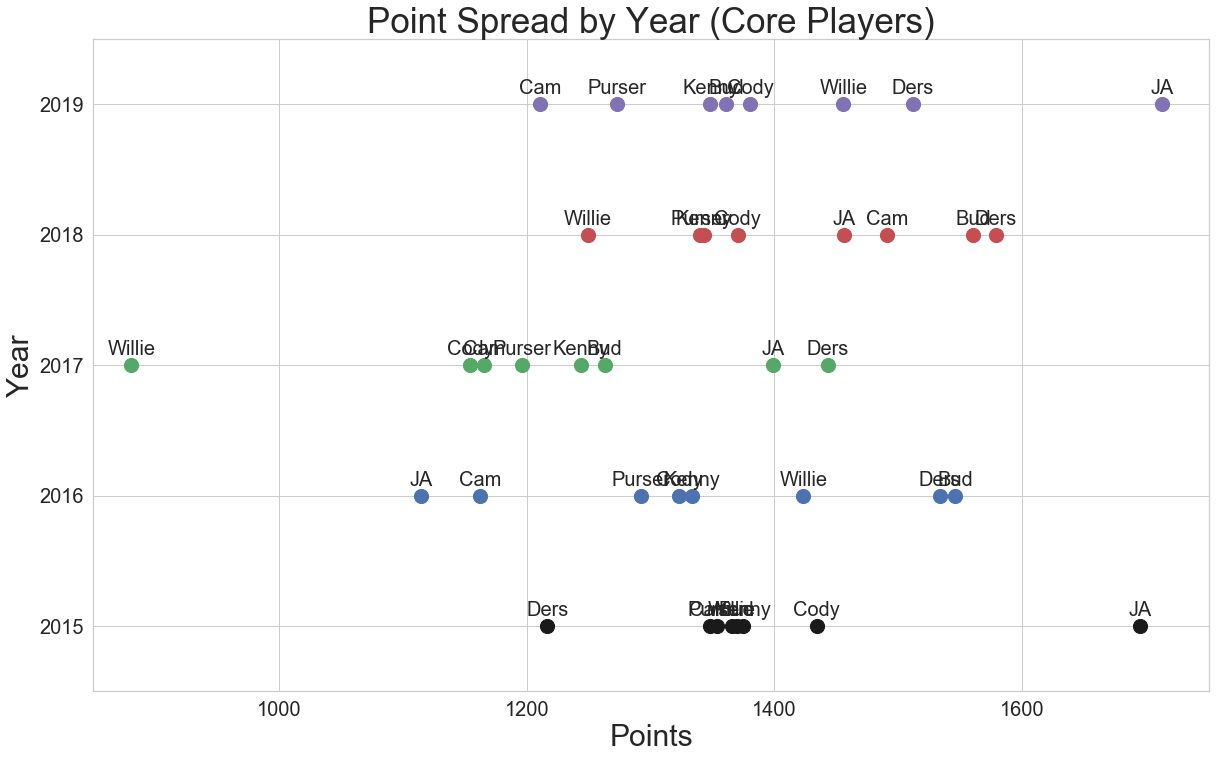

In [837]:
fig,ax = plt.subplots(figsize=(20,12))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylim(2014.5,2019.5)
ax.set_xlim(850,1751,50)
plt.xlabel('Points',fontsize = 30)
plt.ylabel('Year',fontsize = 30)
plt.title('Point Spread by Year (Core Players)', fontsize = 35)
plt.scatter(x=scTotals.loc[0].drop('index',axis=0),y=[scTotals.loc[0]['index']]*len(columns),color='k',s=200)
plt.scatter(x=scTotals.loc[1].drop('index',axis=0),y=[scTotals.loc[1]['index']]*len(columns),color='b',s = 200)
plt.scatter(x=scTotals.loc[2].drop('index',axis=0),y=[scTotals.loc[2]['index']]*len(columns),color='g',s = 200)
plt.scatter(x=scTotals.loc[3].drop('index',axis=0),y=[scTotals.loc[3]['index']]*len(columns),color='r',s = 200)
plt.scatter(x=scTotals.loc[4].drop('index',axis=0),y=[scTotals.loc[4]['index']]*len(columns),color='m',s = 200)

for i,n in enumerate([2015,2016,2017,2018,2019]):
    labels=list(scTotals[columns].sort_values(by=i,axis=1,ascending=True).columns)
    for j, player in enumerate(labels):
        plt.annotate(player,
                     (scTotals.loc[i][player],n),
                     textcoords = 'offset points',
                     xytext=(0,10),
                     ha='center',
                    fontsize = 20)

<b> I don't have anything super insightful here. I thought it would be interesting to see how far apart all the point scorers are. This graph would be easier to read if I didn't worry about including Willie's all-time-worst 2017 season. Not too surprising that JA holds the two highest scoring seasons among us.</b>

<h2> Now we'll break down each individual year and see how scoring lined up with where we actually placed. </h2>

In [838]:
# Reload data for cleanliness
places = pd.read_csv("FF_Places.csv")
scTotals = pd.read_csv("FF_Scoring_totals.csv")

# Re-transform it to best usable, but keep everyone's data for each season (not just core 8 players)
places = places.T
places.columns = places.iloc[0]
places = places.drop(places.index[0])
places.reset_index(inplace=True)
places['index'] = places['index'].apply(int)

scTotals = scTotals.T
scTotals.columns = scTotals.iloc[0]
scTotals = scTotals.drop(scTotals.index[0])
scTotals.reset_index(inplace=True)
scTotals['index'] = scTotals['index'].apply(int)

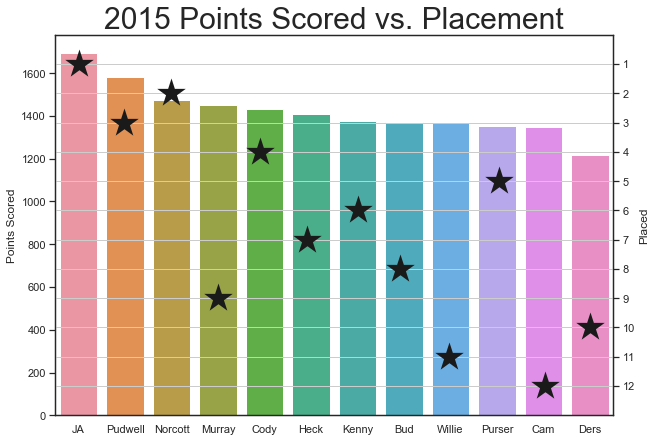

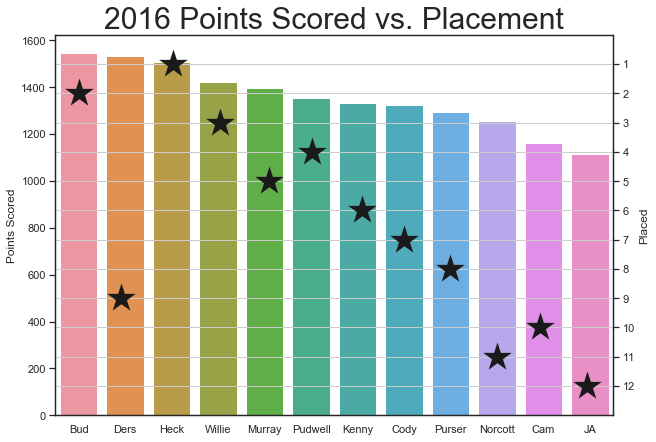

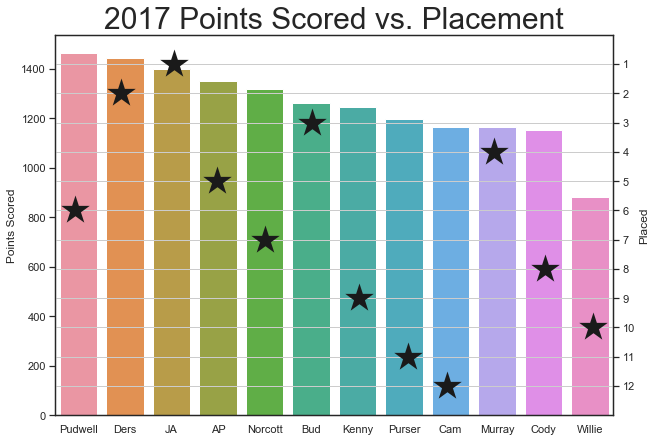

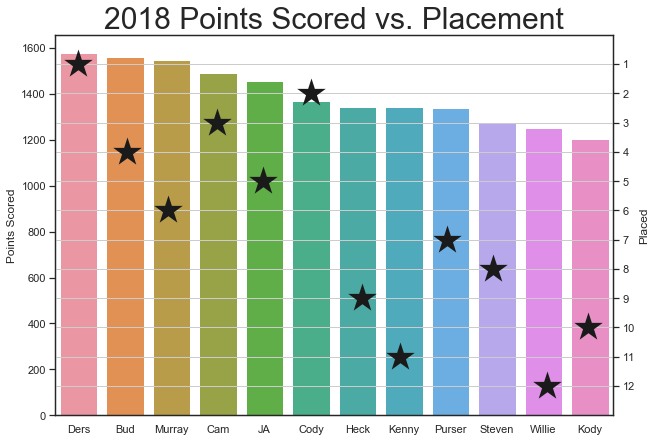

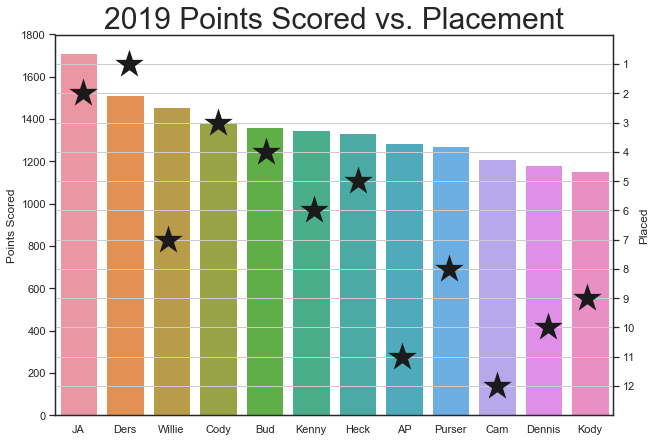

In [839]:
for i,n in enumerate([2015,2016,2017,2018,2019]):
    columns = list(places[places['index']==n].dropna(axis=1).columns) # This get the correct list of players each season
    columns.pop(0) # This removes the "index" column bc I'm sloppy
    
    sns.set_style('white')
    fig, ax = plt.subplots(figsize=(10,7))
    sns.barplot(x=list(scTotals[columns].sort_values(by=i,axis=1,ascending=False).columns), # X sets the players for each graph, sorting on the index value (0,1,2,3,4)
                y=scTotals[columns].sort_values(by=i,axis=1,ascending=False).iloc[i]) # Y plots the points scored
    ax.set_ylabel("Points Scored")
    ax.grid(False)
    
    ax2 = ax.twinx() # Builds the extra y-axis on the right side
    
    sns.stripplot(x=list(scTotals[columns].sort_values(by=i,axis=1,ascending=False).columns), # X is same as above
                  y=places[list(scTotals[columns].sort_values(by=i,axis=1,ascending=False).columns)].iloc[i], # This makes sure Y values from the "places" table are aligned and plotted properly
                                color='k',size=30,marker="*")
    ax2.set_ylabel("Placed")
    ax2.set_ylim(13,0)
    ax2.set_yticks(range(1,13,1))
    ax2.grid(zorder=0)
    plt.title(f'{n} Points Scored vs. Placement', fontsize=30)

<h3> In a fair and just fantasy world, the stars would be in a perfectly diagonal line from the upper left to the bottom right. The high scorers would always be rewarded with large payouts and lavish gifts, and the fantasy filth would be picking through the dumpster scraps after the fantasy championship party.</h3><br>
Obviously that's never really how it goes.<br><br>
2015, the inaugural Blackout, was a pretty fair year. The top 3 scorers were the top 3 finishers, but poor Matt Murray finished in 9th despite being the 4th overall scorer. I should've been dead last this year, but escaped with a 10th place vicory while being last in scoring by over 100 points.<br><br>
2016 got much better raw performance out of me, but I really got screwed with a 9th place finish. It was a decently even distribtution besides that, with Bud coming as close as he ever would to winning the championship and JA taking a year off.<br><br>
2017 gets pretty fuckin wonky. Pudwell felt my pain, finishing 6th in the standings while being the top scorer overall. I finally got my shot at the championship in my first matchup vs. JA, where he took me down to win his 2nd title and complete his weird 1st-12th-1st cycle over three years. Murray got a little retribution from 2015 this year, finishing 4th in the standings with the 10th most points scored, almost exactly the opposite of his 2015 shafting. Willie somehow managed to finish 10th overall while scoring 880 points over the season. That's only 55 points per game. Honestly how the shit did that happen?<br><br>
In 2018 I finally earned my place in the fantasy champions' circle with a championship win over Cody, and led the league in points scored. Bud continued his regular season excellence but again gets unlucky, as did Matt Murray. This was CamRod's greatest showing by far, with a 3rd place finish and 4th leading scorer. Cody's 2nd place finish that year shows how getting into the playoffs can give you a shot to go on a little run and maybe win something.<br><br>
JA was a fucking juggernaut in 2019. This was by far the largest 1st place-2nd place drop off and an insanely dominant season from a points standpoint. I went up against JA again in the championship, and this time I was able to knock him off for a back-to-back title on the back of some insane performances from my guys. This was like the 2008 Giants beating the Patriots. This was the 8 seed Warriors beating the Mavericks. JA was a fantasy force of nature with top-10 players at almost every position (only missing the flex). I lucked out because Dalvin got hurt, sure, but everyone's got their share of injuries to deal with. Anyways, Willie got the shaft this year with an unfortunate 7th place finish, and Bud kept on keeping on just like he always does. Kenny made it back to 6th place where he's clearly most comfortable. Cam has gotta figure something out.